In [44]:
import cv2 as cv
import numpy as np
from salient_validator import SalientValidator
from heatmap_extractor import HeatmapCenterExtractor

In [45]:
def load_videos(path: str) -> tuple:

    screen_frames = [f'{path}/screen/{frame}' 
                        for frame in os.listdir(f'{path}/screen') 
                            if frame != '.DS_Store']
    
    hm_frames = [f'{path}/heatmap/{frame}' 
                    for frame in os.listdir(f'{path}/heatmap') 
                        if frame != '.DS_Store']

    sal_frames = [f'{path}/sal/{frame}' 
                    for frame in os.listdir(f'{path}/sal') 
                        if frame != '.DS_Store']

    return screen_frames, hm_frames, sal_frames

In [46]:
hce = HeatmapCenterExtractor()

In [47]:
image = '0186'

In [48]:
screen_test = cv.imread(f'../data/Video/E4/screen/{image}.png')
heatmap_test = cv.imread(f'../data/Video/E4/heatmap/{image}.png')
sal_test = cv.imread(f'../data/Video/E4/sal/{image}.jpeg', cv.IMREAD_GRAYSCALE)

In [49]:
import matplotlib.pyplot as plt

In [50]:
def get_heatmap_mask(screen: np.array, heatmap: np.array):

    diff = cv.absdiff(cv.cvtColor(screen, cv.COLOR_BGR2GRAY),
                    cv.cvtColor(heatmap, cv.COLOR_BGR2GRAY))

    _, bi = cv.threshold(diff,10,255,0)

    contour = hce.get_salience_contour(bi)
    if contour is not None:
        contour = contour.contour
    else:
        return None
    #create a mask of 0 with the area indise the contour as 1
    mask = np.zeros(screen.shape[:2], dtype=np.uint8)
    cv.drawContours(mask, [contour], -1, color=(255, 255, 255), thickness=cv.FILLED)
    return mask

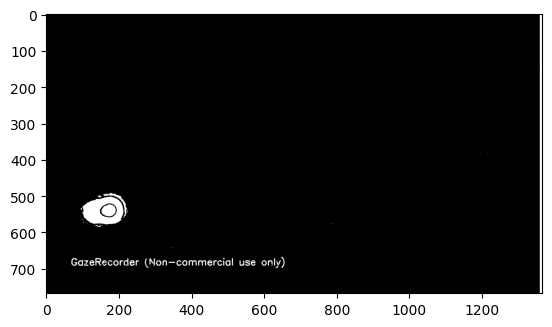

In [51]:
diff = cv.absdiff(cv.cvtColor(screen_test, cv.COLOR_BGR2GRAY),
                    cv.cvtColor(heatmap_test, cv.COLOR_BGR2GRAY))

_, bi = cv.threshold(diff,15,255,0)

plt.imshow(bi, cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


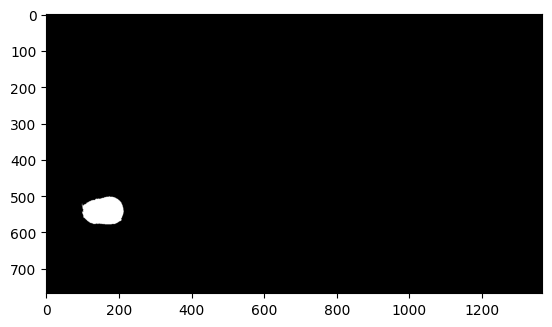

In [52]:
mask = get_heatmap_mask(screen_test, heatmap_test)
print(mask)
plt.imshow(mask, cmap='gray')

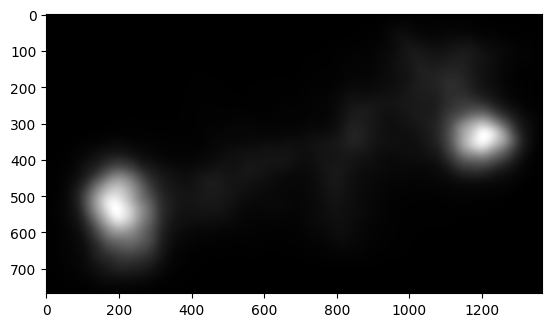

In [53]:
plt.imshow(sal_test, cmap='gray')

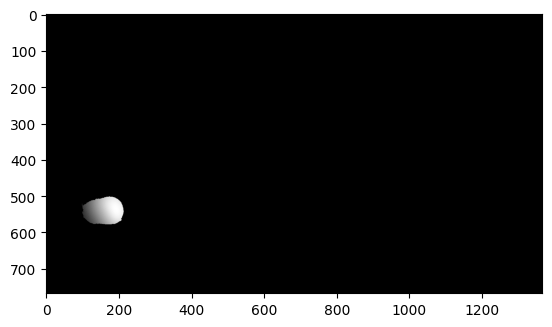

In [54]:
salience = cv.bitwise_and(sal_test, sal_test, mask=mask)

plt.imshow(salience, cmap='gray')

In [55]:
print(mask)
print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [56]:
print(np.sum(salience))

1238150


In [57]:
np.count_nonzero(salience)

7049

In [58]:
mask_size = np.count_nonzero(mask == 255)
sal_sum = np.sum(salience)

print(sal_sum / mask_size)

175.64902823095474


True

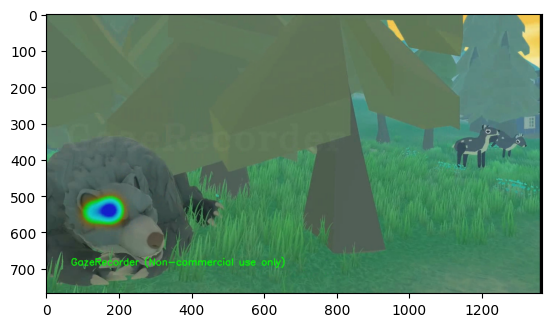

In [59]:
plt.imshow(heatmap_test)
heatmap_test[600:710, :800] = screen_test[600:710, :800]
cv.imwrite('heatmap.png', heatmap_test)

In [60]:
sal_screen = cv.addWeighted(screen_test, 0.8, 
                          cv.cvtColor(sal_test, cv.COLOR_GRAY2BGR), 0.5, 0)
cv.imwrite('sal_screen.png', sal_screen)

True

In [61]:
intersec = cv.addWeighted(screen_test, 0.8, 
                          cv.cvtColor(salience, cv.COLOR_GRAY2BGR), 0.5, 0)
cv.imwrite('intersec.png', intersec)

True

In [62]:
#create a image with the tree images side by side: heatmap, sal_screen, intersec
# heatmap_test[500:710, :800] = screen_test[500:710, :800]
# heatmap_test = cv.addWeighted(heatmap_test, 0.8, 
#                           np.zeros_like(heatmap_test), 0.5, 0)
# img = np.hstack((heatmap_test[:, :1200], sal_screen[:, :1200], intersec[:, :1200]))
# cv.imwrite('heatmap_sal_compare.png', img)

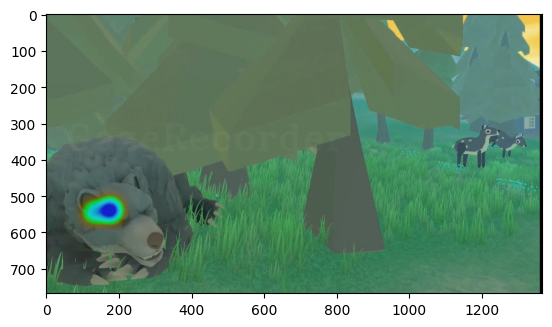

In [70]:
# remove the button half from the heatmap image and put the buttom half of the screen image
heatmap_test[600:710, :800] = cv.addWeighted(screen_test[600:710, :800], 0.95, np.zeros_like(screen_test[600:710, :800]), 0.8, 0)
cv.imwrite('heatmap.png', heatmap_test)
plt.imshow(heatmap_test)